# Data generation file

**Purpose: Generate data for use in data study of STV election resilience to Sybil attacks**

Premise: Based on inputs $C$, number of candidates and $V$, number of voters, randomly allocate voters to preference orders of candidates. Place candidates and voters on a political compass

Methodology: Generate a 1000 size grid. Randomly place candidates, with an option to normally distribute about the origin (reflecting 'normal' political centre). Randomly place voters, with an option to normally distribute about the origin. 

Calculate linear distance between each voter and every candidate. Rank linear distances with shortest-first. Return candidates and rankings paired as a list of voter preferences. 

* Will not scale for >100 candidates. Set GridSize to something that scales with C, e.g. $1000+C^3$

In [187]:
#Setup
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


C = 5
V = 100

GridSize = 1000

NormallyDistributeAboutOrigin = True

In [188]:
#Random point generation functions

def GenerateRandomPosition_NORMAL(GridSize):
    lower = -GridSize
    upper = GridSize
    mu,sigma = 0,GridSize/2
    Generator = scipy.stats.truncnorm((lower-mu)/sigma, (upper-mu)/sigma, loc=mu, scale=sigma)
    X,Y= Generator.rvs(2)
    return (X,Y)

def GenerateRandomPosition_UNIFORM(GridSize):
    X = random.uniform(-GridSize,GridSize)
    Y = random.uniform(-GridSize,GridSize)
    return (X,Y)

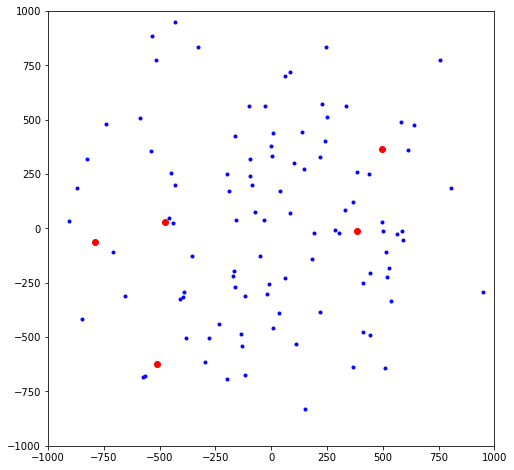

In [190]:
#Generate and plot candidate locations
if NormallyDistributeAboutOrigin == True:
    CandLocs = np.array([GenerateRandomPosition_NORMAL(GridSize) for i in range(0,C)])
    VoterLocs = np.array([GenerateRandomPosition_NORMAL(GridSize) for i in range(0,V)])
else:
    CandLocs = np.array([GenerateRandomPosition_UNIFORM(GridSize) for i in range(0,C)])
    VoterLocs = np.array([GenerateRandomPosition_UNIFORM(GridSize) for i in range(0,V)])

plt.figure(figsize=(8,8))
plt.xlim([-GridSize,GridSize])
plt.ylim([-GridSize,GridSize])
for i in range(0,C): 
    plt.plot(CandLocs[i][0],CandLocs[i][1],'ro')

for j in range(0,V):
    plt.plot(VoterLocs[j][0],VoterLocs[j][1],'b.')

In [212]:
#Calculate linear distance from each voter to each candidate and return Rankings list
#Rankings = np.empty((V,C),dtype=str)
Rankings = []
for k in range(V):
    VoterDistancesToCandidates = [numpy.linalg.norm(VoterLocs[k]-CandLocs[c]) for c in range(C)]
    VoterRankings = scipy.stats.rankdata(VoterDistancesToCandidates)
    VoterCandidateOrder = {"C"+str(int(i+1)):np.where(VoterRankings==i+1)[0] for i in range(C)}
    print(VoterCandidateOrder)
    #VoterCandidateOrder = [for l in VoterRankings]
    
    #VoterCandidateOrder = ["C"+str(int(i)) for i in VoterRankings]
    #Rankings[k] = VoterCandidateOrder
    Rankings.append(VoterCandidateOrder)

print(Rankings[:2],"...", Rankings[-1:])
print(VoterDistancesToCandidates)
print(VoterRankings)
print(VoterCandidateOrder)



{'C1': array([0], dtype=int64), 'C2': array([3], dtype=int64), 'C3': array([4], dtype=int64), 'C4': array([1], dtype=int64), 'C5': array([2], dtype=int64)}
{'C1': array([0], dtype=int64), 'C2': array([3], dtype=int64), 'C3': array([4], dtype=int64), 'C4': array([1], dtype=int64), 'C5': array([2], dtype=int64)}
{'C1': array([1], dtype=int64), 'C2': array([0], dtype=int64), 'C3': array([4], dtype=int64), 'C4': array([2], dtype=int64), 'C5': array([3], dtype=int64)}
{'C1': array([3], dtype=int64), 'C2': array([0], dtype=int64), 'C3': array([4], dtype=int64), 'C4': array([2], dtype=int64), 'C5': array([1], dtype=int64)}
{'C1': array([4], dtype=int64), 'C2': array([1], dtype=int64), 'C3': array([0], dtype=int64), 'C4': array([2], dtype=int64), 'C5': array([3], dtype=int64)}
{'C1': array([1], dtype=int64), 'C2': array([4], dtype=int64), 'C3': array([2], dtype=int64), 'C4': array([0], dtype=int64), 'C5': array([3], dtype=int64)}
{'C1': array([0], dtype=int64), 'C2': array([3], dtype=int64), '

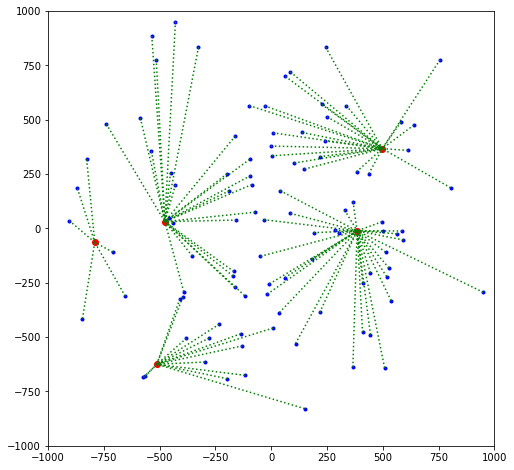

In [194]:
#Plotting the 1st choice candidates for each voter, for fun
#Since this cell won't be used often it redoes some of the code above (to avoid integrating them)
plt.figure(figsize=(8,8))
plt.xlim([-GridSize,GridSize])
plt.ylim([-GridSize,GridSize])
for i in range(0,C): 
    plt.plot(CandLocs[i][0],CandLocs[i][1],'ro')

for j in range(0,V):
    plt.plot(VoterLocs[j][0],VoterLocs[j][1],'b.')
    VoterDistancesToCandidates = [numpy.linalg.norm(VoterLocs[j]-Cand) for Cand in CandLocs]
    VoterRankings = scipy.stats.rankdata(VoterDistancesToCandidates)
    FaveCandidateLoc = CandLocs[np.where(VoterRankings==1)[0]][0]
    plt.plot((VoterLocs[j][0],FaveCandidateLoc[0]),(VoterLocs[j][1],FaveCandidateLoc[1]),"g",ls='dotted')
    #plt.plot(VoterLocs[j],FaveCandidateLoc,'-g')
    

In [195]:
#Verify that the number of first-choice votes looks consistent with the image
for i in range(1,C+1):
    #Number = len([Rankings[i] if Rankings[i][0]==str("C"+i) for i in range(C)]) # really wanted to one-line this but don't know how
    FirstChoices = 0
    for j in range(V):
        if Rankings[j][0]=="C"+str(i):
            FirstChoices += 1
    print("C",str(i)," has ",FirstChoices," first choices.")
print(Rankings)

C 1  has  32  first choices.
C 2  has  30  first choices.
C 3  has  11  first choices.
C 4  has  27  first choices.
C 5  has  0  first choices.
[['C1', 'C4', 'C5', 'C2', 'C3'], ['C1', 'C4', 'C5', 'C2', 'C3'], ['C2', 'C1', 'C4', 'C5', 'C3'], ['C2', 'C5', 'C4', 'C1', 'C3'], ['C3', 'C2', 'C4', 'C5', 'C1'], ['C4', 'C1', 'C3', 'C5', 'C2'], ['C1', 'C4', 'C5', 'C2', 'C3'], ['C1', 'C4', 'C5', 'C2', 'C3'], ['C4', 'C1', 'C3', 'C5', 'C2'], ['C4', 'C1', 'C3', 'C5', 'C2'], ['C2', 'C5', 'C4', 'C1', 'C3'], ['C3', 'C1', 'C4', 'C5', 'C2'], ['C1', 'C4', 'C5', 'C2', 'C3'], ['C3', 'C1', 'C4', 'C5', 'C2'], ['C2', 'C5', 'C4', 'C1', 'C3'], ['C1', 'C4', 'C5', 'C2', 'C3'], ['C1', 'C3', 'C5', 'C2', 'C4'], ['C2', 'C5', 'C4', 'C1', 'C3'], ['C1', 'C2', 'C5', 'C4', 'C3'], ['C1', 'C3', 'C4', 'C5', 'C2'], ['C2', 'C5', 'C4', 'C3', 'C1'], ['C2', 'C5', 'C4', 'C1', 'C3'], ['C2', 'C5', 'C3', 'C4', 'C1'], ['C2', 'C5', 'C4', 'C1', 'C3'], ['C2', 'C5', 'C4', 'C1', 'C3'], ['C4', 'C5', 'C2', 'C3', 'C1'], ['C1', 'C2', 'C5', 'C4'

In [193]:
#Not yet used: how do we want the data type in the end?

#Pair CandLocs and VoterLocs up to voter and candidate numbers
CandDict = {str("C")+str(i):CandLocs[i] for i in range(0,C)}
CandDict

{'C0': array([384.64455127, -11.63953992]),
 'C1': array([-512.9043103 , -624.98078198]),
 'C2': array([-790.81532748,  -64.09577127]),
 'C3': array([497.40925282, 366.59283432]),
 'C4': array([-476.75127549,   30.84393231])}